In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import chi2_contingency

from scipy import stats

from sklearn.preprocessing import StandardScaler


In [2]:
import sklearn
print(sklearn.__version__)

1.0.2


In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
!pip install mlxtend

In [5]:
ch=  pd.read_csv("C:/Users/EZHILVATHANI S/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")
ch.shape

(7043, 21)

In [6]:
ch['target']=np.where(ch['Churn']=="Yes",1,0)

In [7]:
ch=ch.drop(['Churn'],axis=1)

In [8]:
ch['target'].value_counts()

0    5174
1    1869
Name: target, dtype: int64

In [9]:
ch.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [10]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
ch.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,target
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992,0.265370
std,0.368612,24.559481,30.090047,2266.730170,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [12]:
ch.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6534
target                 2
dtype: int64

In [13]:
ch.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
target              0
dtype: int64

In [14]:
ch.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'target'],
      dtype='object')

In [15]:
ch.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [16]:
ch.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,0


In [17]:
ch.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
target                int32
dtype: object

In [18]:
#only numeric values
ch_numeric = ch.select_dtypes(include=['float64', 'int64','int32'])
ch_numeric.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,target
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1


In [19]:
ch_numeric.tail()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,target
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1
7042,0,66,105.65,6844.50,0


In [20]:
ch_numeric.shape

(7043, 5)

In [21]:
ch_numeric.nunique()

SeniorCitizen        2
tenure              73
MonthlyCharges    1585
TotalCharges      6534
target               2
dtype: int64

In [22]:
#only categorical features
ch_category = ch.select_dtypes(include=['object'])
ch_category.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [23]:
ch_category.tail()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check
7042,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)


In [24]:
ch_category.shape

(7043, 16)

In [25]:
ch_category.nunique()

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
dtype: int64

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


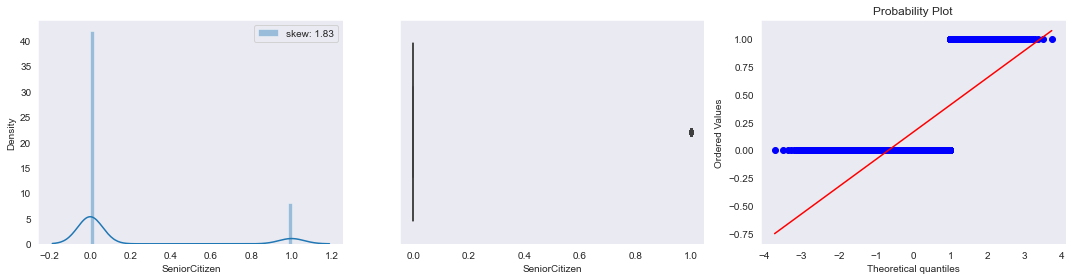

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


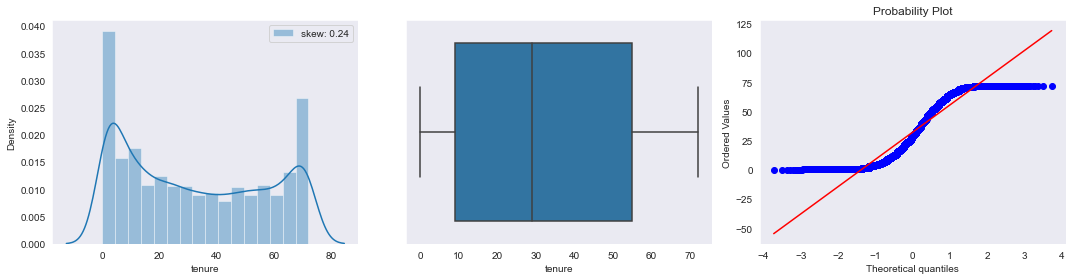

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


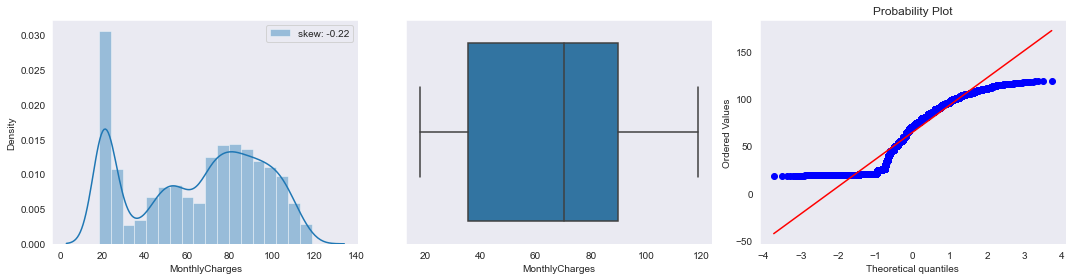

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


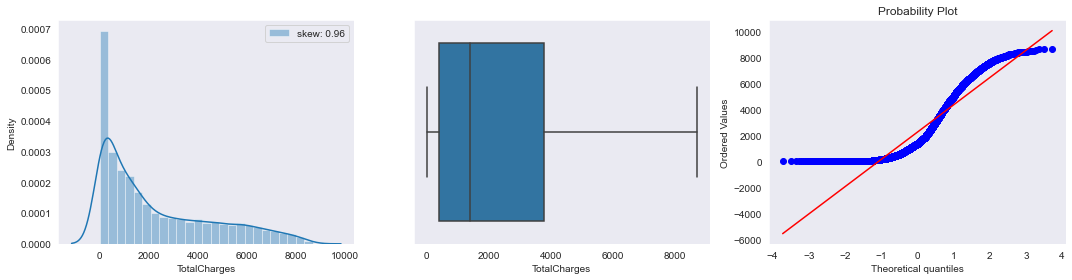

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


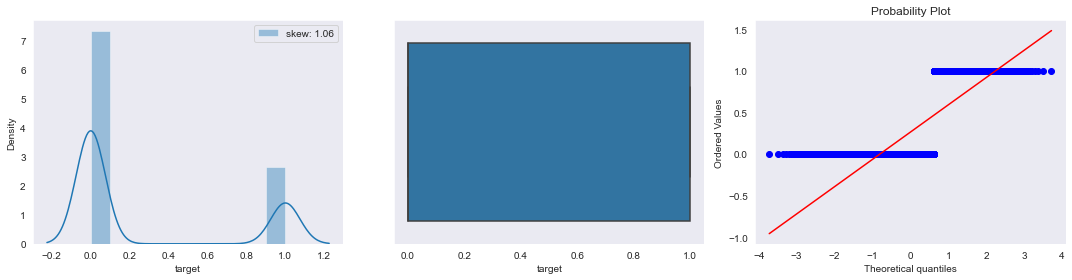

In [26]:
## checking outliers by using boxplot

sns.set_style('dark')
for cols in ch_numeric.describe().columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(ch_numeric[cols], label="skew: " + str(np.round(ch_numeric[cols].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(ch_numeric[cols])
    plt.subplot(133)
    stats.probplot(ch_numeric[cols], plot=plt)
    plt.tight_layout()
    plt.show()

In [27]:
ch_numeric.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'target'], dtype='object')

In [28]:
## there is no outliers

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


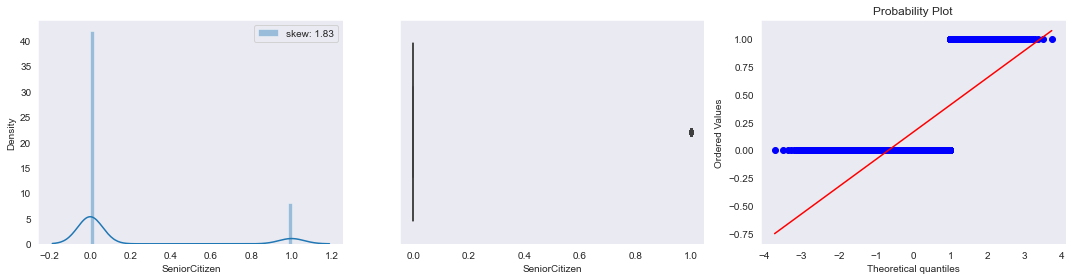

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


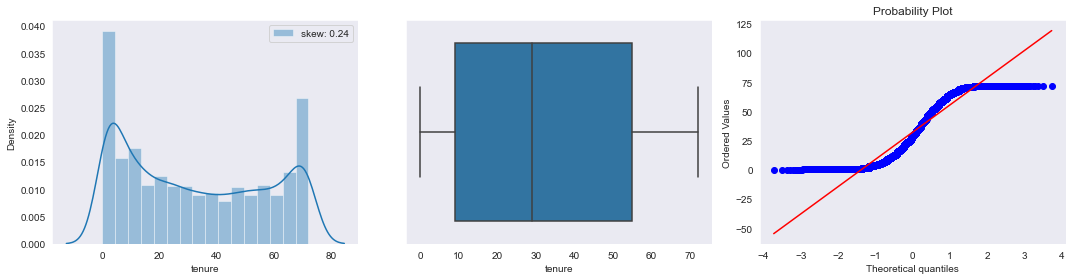

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


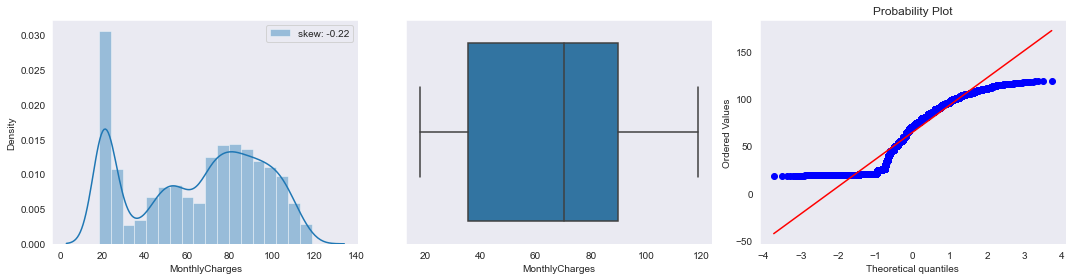

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


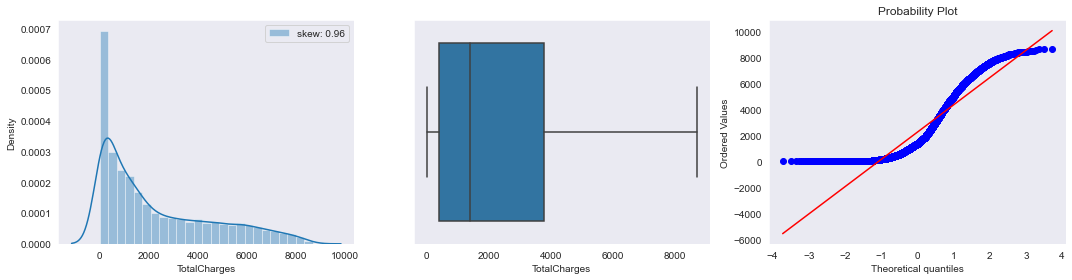

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


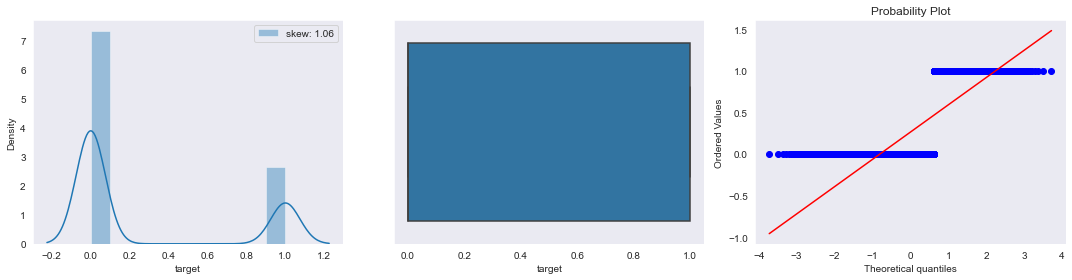

In [29]:
sns.set_style('dark')
for cols in ch_numeric.describe().columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(ch_numeric[cols], label="skew: " + str(np.round(ch_numeric[cols].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(ch_numeric[cols])
    plt.subplot(133)
    stats.probplot(ch_numeric[cols], plot=plt)
    plt.tight_layout()
    plt.show()

In [30]:
ch = ch.drop('customerID', axis=1)

In [31]:
#Splitting the target feature from independent features




df_y = ch['target']
df_x = ch.drop('target', axis = 1)


In [32]:
df_x.shape, df_y.shape

((7043, 19), (7043,))

In [33]:
df_x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [34]:
df_y.head()

0    0
1    0
2    1
3    0
4    1
Name: target, dtype: int32

In [35]:
cor_numeric = ch_numeric.corr()
cor_numeric

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,target
SeniorCitizen,1.000000,0.016567,0.220173,0.102997,0.150889
tenure,0.016567,1.000000,0.247900,0.826164,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651182,0.193356
TotalCharges,0.102997,0.826164,0.651182,1.000000,-0.198347
target,0.150889,-0.352229,0.193356,-0.198347,1.000000


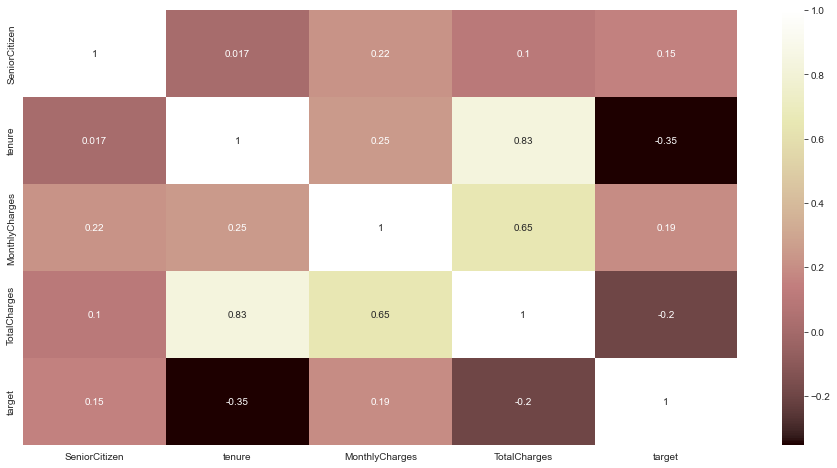

In [36]:
# FINIDING UNNESSCARY FEATURES 
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor_numeric, cmap="pink", annot=True)
plt.show()

In [37]:
# HANDLING CATEGORICAL FEATURES BY USING ONE HOT ENCODING

In [38]:
ch_category = ch.select_dtypes(include=['object'])
ch_category.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [39]:
ch_dummy=pd.get_dummies(ch_category,drop_first=True)
ch_dummy.head()


,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [40]:
ch_dummy.shape

(7043, 26)

In [41]:
# dropping categorical columns 
XX=ch.drop(list(ch_category.columns), axis=1)
XX

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,target
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [42]:
XX.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'target'], dtype='object')

In [43]:
#merging numerical columns and dummy columns
X = pd.concat([XX,ch_dummy] ,axis=1)
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,target,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [44]:
X.shape

(7043, 31)

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   target                                 7043 non-null   int32  
 5   gender_Male                            7043 non-null   uint8  
 6   Partner_Yes                            7043 non-null   uint8  
 7   Dependents_Yes                         7043 non-null   uint8  
 8   PhoneService_Yes                       7043 non-null   uint8  
 9   MultipleLines_No phone service         7043 non-null   uint8  
 10  MultipleLines_Yes                      7043 non-null   uint8  
 11  Inte

In [46]:
X.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,target,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992,0.265370,0.504756,0.483033,0.299588,0.903166,0.096834,...,0.216669,0.384353,0.216669,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880
std,0.368612,24.559481,30.090047,2266.730170,0.441561,0.500013,0.499748,0.458110,0.295752,0.295752,...,0.412004,0.486477,0.412004,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
cor = X.corr()
cor

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,target,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016567,0.220173,0.102997,0.150889,-0.001874,0.016479,-0.211185,0.008576,-0.008576,...,-0.182742,0.105378,-0.182742,0.120176,-0.046262,-0.117000,0.156530,-0.024135,0.171718,-0.153477
tenure,0.016567,1.000000,0.247900,0.826164,-0.352229,0.005106,0.379697,0.159712,0.008448,-0.008448,...,-0.039062,0.279756,-0.039062,0.286111,0.202570,0.558533,0.006152,0.233006,-0.208363,-0.233852
MonthlyCharges,0.220173,0.247900,1.000000,0.651182,0.193356,-0.014569,0.096848,-0.113890,0.247398,-0.247398,...,-0.763557,0.629603,-0.763557,0.627429,0.004904,-0.074681,0.352150,0.030550,0.271625,-0.377437
TotalCharges,0.102997,0.826164,0.651182,1.000000,-0.198347,-0.000087,0.317532,0.062124,0.113203,-0.113203,...,-0.375229,0.514999,-0.375229,0.520124,0.170807,0.354539,0.158562,0.182913,-0.059268,-0.295740
target,0.150889,-0.352229,0.193356,-0.198347,1.000000,-0.008612,-0.150448,-0.164221,0.011942,-0.011942,...,-0.227890,0.063228,-0.227890,0.061382,-0.177820,-0.302253,0.191825,-0.134302,0.301919,-0.091683
gender_Male,-0.001874,0.005106,-0.014569,-0.000087,-0.008612,1.000000,-0.001808,0.010517,-0.006488,0.006488,...,0.006026,-0.008393,0.006026,-0.010487,0.008026,-0.003695,-0.011754,0.001215,0.000752,0.013744
Partner_Yes,0.016479,0.379697,0.096848,0.317532,-0.150448,-0.001808,1.000000,0.452676,0.017706,-0.017706,...,0.000615,0.124666,0.000615,0.117412,0.082783,0.248091,-0.014877,0.082029,-0.083852,-0.095125
Dependents_Yes,-0.211185,0.159712,-0.113890,0.062124,-0.164221,0.010517,0.452676,1.000000,-0.001762,0.001762,...,0.139812,-0.016558,0.139812,-0.039741,0.068368,0.204613,-0.111377,0.060267,-0.150642,0.059071
PhoneService_Yes,0.008576,0.008448,0.247398,0.113203,0.011942,-0.006488,0.017706,-0.001762,1.000000,-1.000000,...,0.172209,-0.022574,0.172209,-0.032959,-0.002791,0.003519,0.016505,-0.007721,0.003062,-0.003319
MultipleLines_No phone service,-0.008576,-0.008448,-0.247398,-0.113203,-0.011942,0.006488,-0.017706,0.001762,-1.000000,1.000000,...,-0.172209,0.022574,-0.172209,0.032959,0.002791,-0.003519,-0.016505,0.007721,-0.003062,0.003319


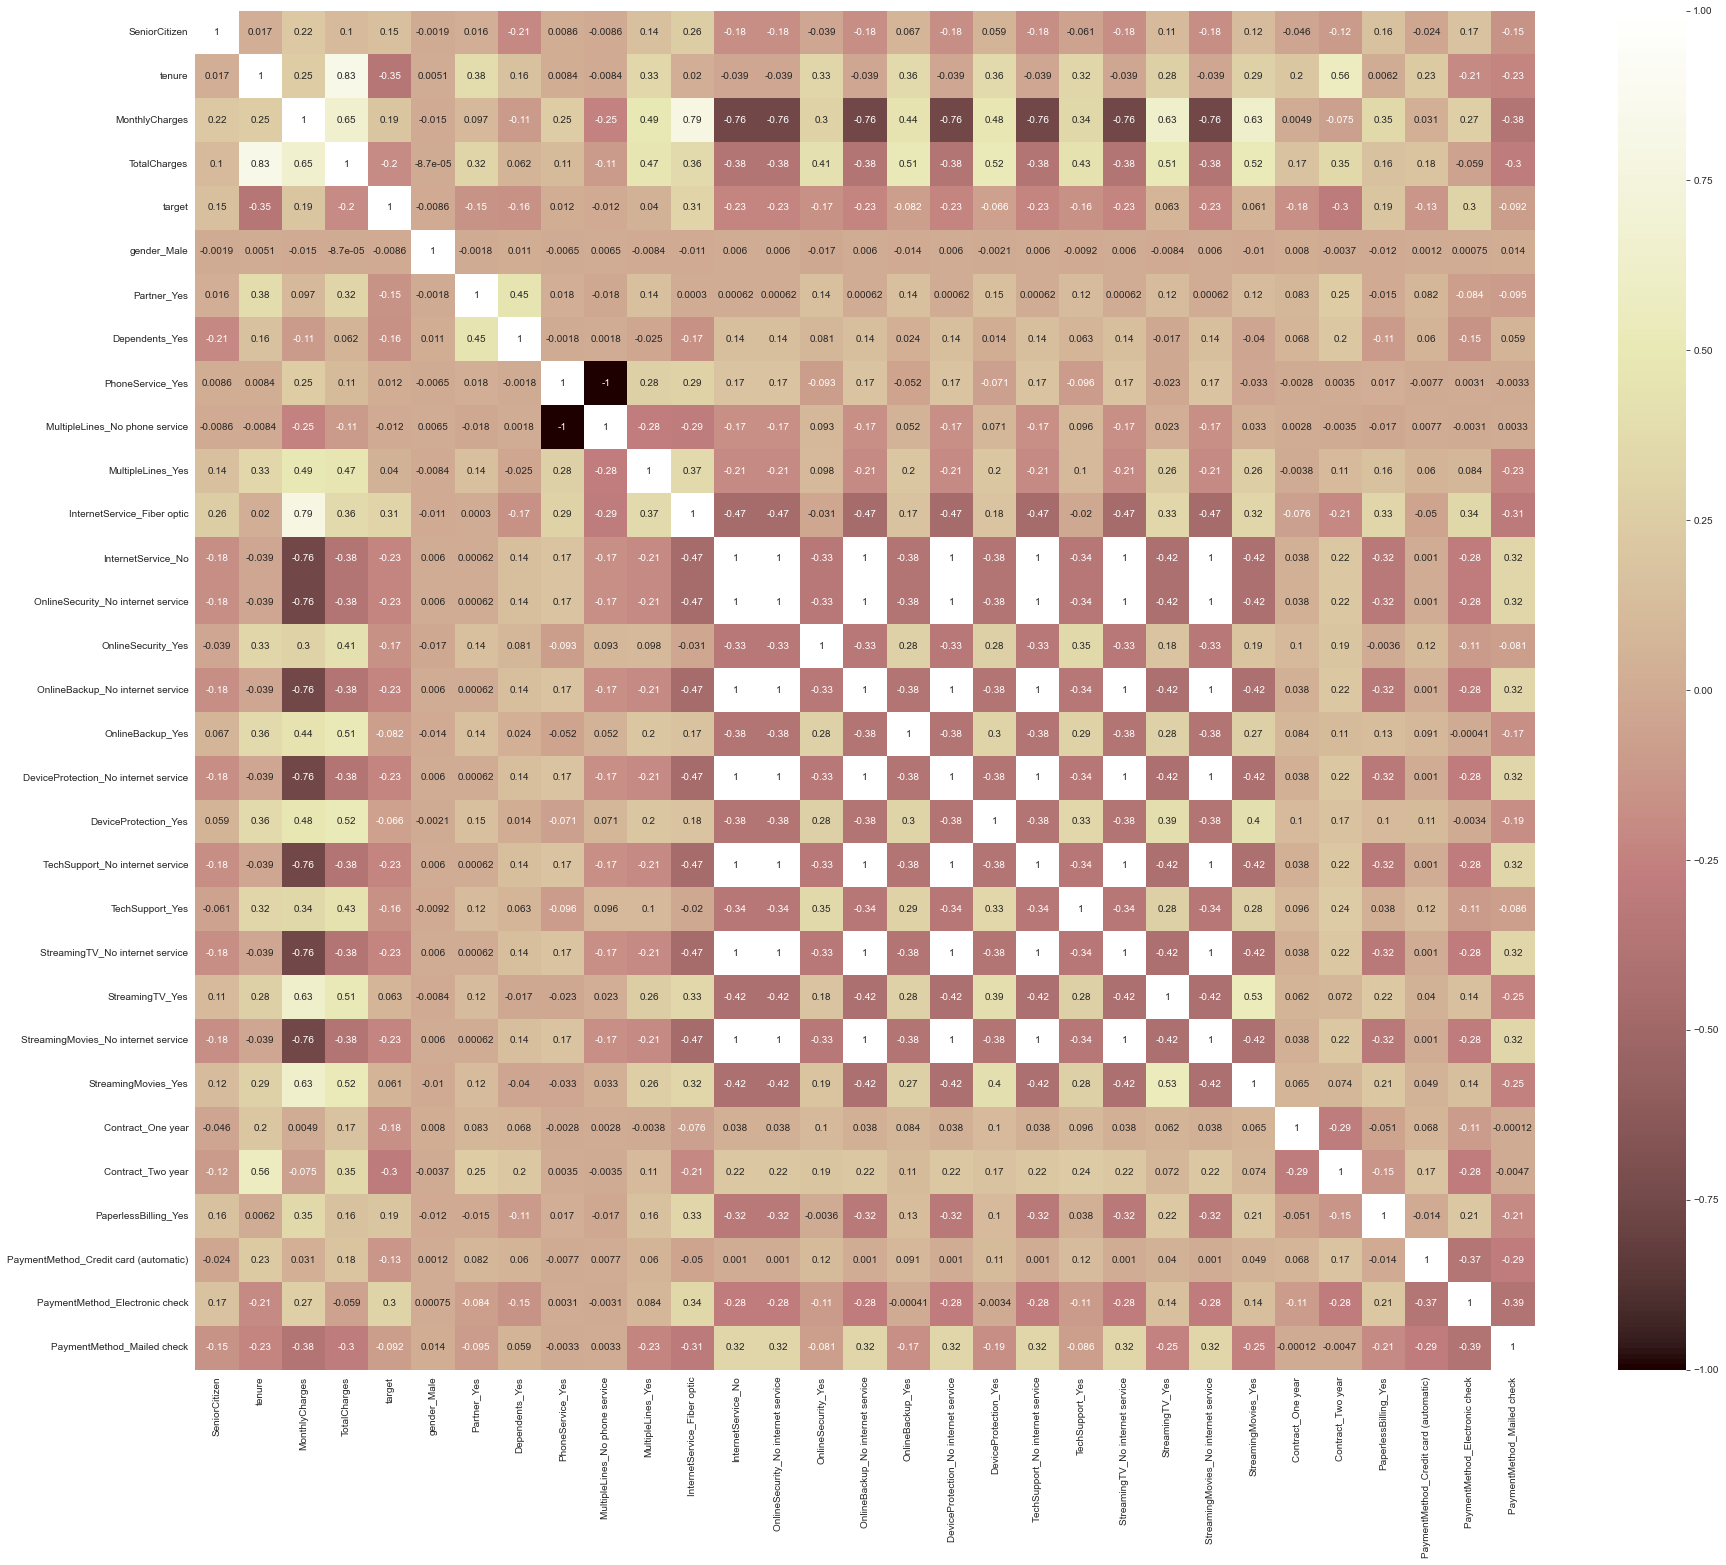

In [48]:
# FINIDING UNNESSCARY FEATURES  for all features
plt.figure(figsize=(30,25))

# heatmap
sns.heatmap(cor, cmap="pink", annot=True)
plt.show()

In [49]:
cor_category = ch_dummy.corr()
cor_category

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender_Male,1.000000,-0.001808,0.010517,-0.006488,0.006488,-0.008414,-0.011286,0.006026,0.006026,-0.017021,...,0.006026,-0.008393,0.006026,-0.010487,0.008026,-0.003695,-0.011754,0.001215,0.000752,0.013744
Partner_Yes,-0.001808,1.000000,0.452676,0.017706,-0.017706,0.142057,0.000304,0.000615,0.000615,0.143106,...,0.000615,0.124666,0.000615,0.117412,0.082783,0.248091,-0.014877,0.082029,-0.083852,-0.095125
Dependents_Yes,0.010517,0.452676,1.000000,-0.001762,0.001762,-0.024526,-0.165818,0.139812,0.139812,0.080972,...,0.139812,-0.016558,0.139812,-0.039741,0.068368,0.204613,-0.111377,0.060267,-0.150642,0.059071
PhoneService_Yes,-0.006488,0.017706,-0.001762,1.000000,-1.000000,0.279690,0.289999,0.172209,0.172209,-0.092893,...,0.172209,-0.022574,0.172209,-0.032959,-0.002791,0.003519,0.016505,-0.007721,0.003062,-0.003319
MultipleLines_No phone service,0.006488,-0.017706,0.001762,-1.000000,1.000000,-0.279690,-0.289999,-0.172209,-0.172209,0.092893,...,-0.172209,0.022574,-0.172209,0.032959,0.002791,-0.003519,-0.016505,0.007721,-0.003062,0.003319
MultipleLines_Yes,-0.008414,0.142057,-0.024526,0.279690,-0.279690,1.000000,0.366083,-0.210564,-0.210564,0.098108,...,-0.210564,0.257152,-0.210564,0.258751,-0.003794,0.106253,0.163530,0.060048,0.083618,-0.227206
InternetService_Fiber optic,-0.011286,0.000304,-0.165818,0.289999,-0.289999,0.366083,1.000000,-0.465793,-0.465793,-0.030696,...,-0.465793,0.329349,-0.465793,0.322923,-0.076324,-0.211526,0.326853,-0.050077,0.336410,-0.306834
InternetService_No,0.006026,0.000615,0.139812,0.172209,-0.172209,-0.210564,-0.465793,1.000000,1.000000,-0.333403,...,1.000000,-0.415552,1.000000,-0.418675,0.038004,0.218278,-0.321013,0.001030,-0.284917,0.321361
OnlineSecurity_No internet service,0.006026,0.000615,0.139812,0.172209,-0.172209,-0.210564,-0.465793,1.000000,1.000000,-0.333403,...,1.000000,-0.415552,1.000000,-0.418675,0.038004,0.218278,-0.321013,0.001030,-0.284917,0.321361
OnlineSecurity_Yes,-0.017021,0.143106,0.080972,-0.092893,0.092893,0.098108,-0.030696,-0.333403,-0.333403,1.000000,...,-0.333403,0.176207,-0.333403,0.187398,0.100162,0.191773,-0.003636,0.115721,-0.112338,-0.080798


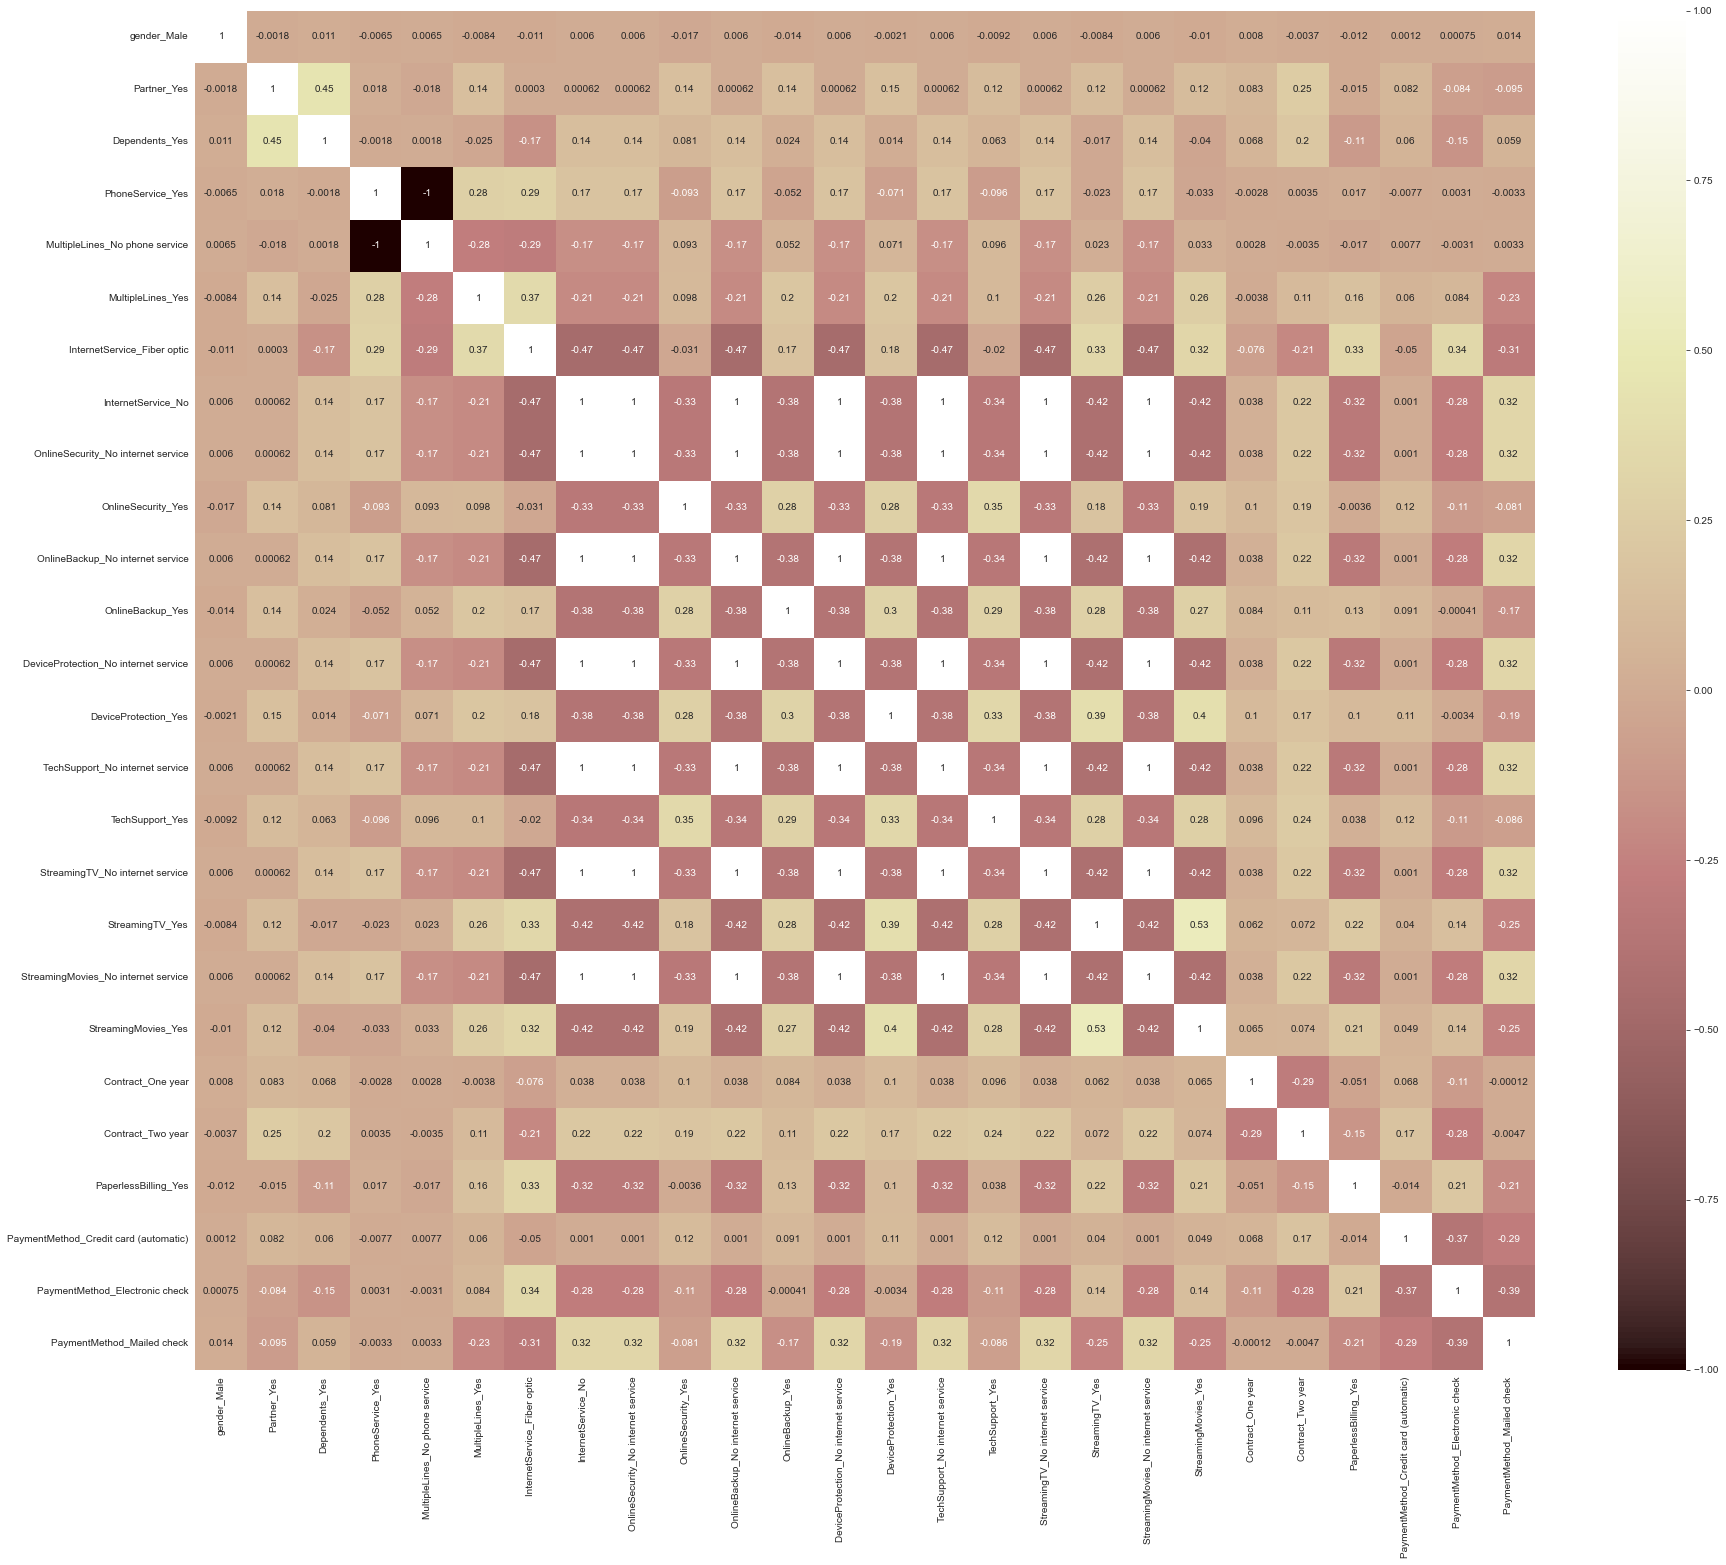

In [50]:
# FINIDING UNNESSCARY FEATURES  for categorical features
plt.figure(figsize=(30,25))

# heatmap
sns.heatmap(cor_category, cmap="pink", annot=True)
plt.show()

In [51]:
pd.crosstab(X['Partner_Yes'],X['target'])

target,0,1
Partner_Yes,,
0,2441,1200
1,2733,669


In [52]:
yy = ch['target']

In [53]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=26)
selector.fit_transform(ch_dummy, yy)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = ch_dummy.iloc[:,cols]

In [54]:
select_features_df_char.iloc[0]

gender_Male                              0
Partner_Yes                              1
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           1
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         1
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMovies_Yes                      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     1
PaymentMeth

In [55]:
'''# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(score_func = chi2, k=26)
selector.fit(ch_dummy, yy)
# Get columns to keep and create new dataframe with those only
feature_score = pd.DataFrame(('Score':selector.scores_,'P_values':selector.pvalues_),index=X.columns)'''

"# Select K Best for Categorical Features\nfrom sklearn.feature_selection import SelectKBest, chi2\nselector = SelectKBest(score_func = chi2, k=26)\nselector.fit(ch_dummy, yy)\n# Get columns to keep and create new dataframe with those only\nfeature_score = pd.DataFrame(('Score':selector.scores_,'P_values':selector.pvalues_),index=X.columns)"

In [56]:
# FINDING MULTICOLLINEARITY BY USING VIF
# FINDING R^2 

import statsmodels.api as sm
features=list(X.columns)
for i in range(1, len(X.columns)):
    x=X.loc[:,X.columns!=features[i]]
    y=X.loc[:,X.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print ("R-Sqr value of {} is {}".format(features[i],rsq))
    print ('VIF for {} is {}'.format(features[i],vif))

R-Sqr value of tenure is 0.8673813400569982
VIF for tenure is 7.54
R-Sqr value of MonthlyCharges is 0.9988440291935158
VIF for MonthlyCharges is 865.07
R-Sqr value of TotalCharges is 0.9079702718033784
VIF for TotalCharges is 10.87
R-Sqr value of target is 0.28416267784894345
VIF for target is 1.4
R-Sqr value of gender_Male is 0.0021513398865321554
VIF for gender_Male is 1.0
R-Sqr value of Partner_Yes is 0.31633515099432974
VIF for Partner_Yes is 1.46
R-Sqr value of Dependents_Yes is 0.27802138467176307
VIF for Dependents_Yes is 1.39
R-Sqr value of PhoneService_Yes is 0.983454879833738
VIF for PhoneService_Yes is 60.44
R-Sqr value of MultipleLines_No phone service is 0.9342177516142883
VIF for MultipleLines_No phone service is 15.2
R-Sqr value of MultipleLines_Yes is 0.8626340532308673
VIF for MultipleLines_Yes is 7.28
R-Sqr value of InternetService_Fiber optic is 0.99325882103992
VIF for InternetService_Fiber optic is 148.34
R-Sqr value of InternetService_No is 1.0
VIF for InternetSer

C:\Users\EZHILV~1\AppData\Local\Temp/ipykernel_11144/400920299.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


R-Sqr value of OnlineSecurity_Yes is 0.8422447837369846
VIF for OnlineSecurity_Yes is 6.34
R-Sqr value of OnlineBackup_No internet service is 1.0
VIF for OnlineBackup_No internet service is inf
R-Sqr value of OnlineBackup_Yes is 0.8525755439638858
VIF for OnlineBackup_Yes is 6.78
R-Sqr value of DeviceProtection_No internet service is 1.0
VIF for DeviceProtection_No internet service is inf
R-Sqr value of DeviceProtection_Yes is 0.8555431960607937
VIF for DeviceProtection_Yes is 6.92
R-Sqr value of TechSupport_No internet service is 1.0
VIF for TechSupport_No internet service is inf
R-Sqr value of TechSupport_Yes is 0.845457952953096
VIF for TechSupport_Yes is 6.47
R-Sqr value of StreamingTV_No internet service is 1.0
VIF for StreamingTV_No internet service is inf
R-Sqr value of StreamingTV_Yes is 0.9584435915912325
VIF for StreamingTV_Yes is 24.06
R-Sqr value of StreamingMovies_No internet service is 1.0
VIF for StreamingMovies_No internet service is inf
R-Sqr value of StreamingMovies_Y

In [57]:
#Splitting the target feature from independent features

ch_Y = X['target']
ch_X = X.drop('target', axis = 1) # will use ch_X in pca

In [58]:
ch_Y.shape

(7043,)

In [59]:
ch_X.shape

(7043, 30)

In [60]:
ch_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   gender_Male                            7043 non-null   uint8  
 5   Partner_Yes                            7043 non-null   uint8  
 6   Dependents_Yes                         7043 non-null   uint8  
 7   PhoneService_Yes                       7043 non-null   uint8  
 8   MultipleLines_No phone service         7043 non-null   uint8  
 9   MultipleLines_Yes                      7043 non-null   uint8  
 10  InternetService_Fiber optic            7043 non-null   uint8  
 11  Inte

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ch_X,ch_Y,test_size=0.3, random_state=42)


In [62]:
x_train.shape

(4930, 30)

In [63]:
y_train.shape

(4930,)

In [64]:
x_test.shape

(2113, 30)

In [65]:
y_test.shape

(2113,)

In [66]:
### step forward selection

In [67]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

clf = LogisticRegression()

clf.fit(x_train,y_train)


sfs1 = sfs(clf,k_features = 21,forward=True,floating=False, verbose=2,scoring='accuracy',cv=5) 

sfs1 = sfs1.fit(x_train, y_train)

sfs1.k_feature_names_


C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.2s finished

[2022-05-24 15:36:47] Features: 1/21 -- score: 0.7373225152129818[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    7.5s finished

[2022-05-24 15:37:16] Features: 7/21 -- score: 0.7983772819472617[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as 

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    4.7s finished

[2022-05-24 15:38:21] Features: 18/21 -- score: 0.8038539553752535[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

('SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Partner_Yes',
 'PhoneService_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check')

In [68]:
sfs1.k_feature_names_

('SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Partner_Yes',
 'PhoneService_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check')

In [69]:
sfs1.k_feature_idx_

(0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 13, 15, 19, 21, 23, 24, 25, 26, 27, 28, 29)

In [70]:
sfs1.k_score_

0.8058823529411765

In [71]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.7373225152129818, 0.7373225152129818, 0.737...",0.737323,"(SeniorCitizen,)",0.0,0.0,0.0
2,"(0, 1)","[0.7596348884381339, 0.7413793103448276, 0.753...",0.752738,"(SeniorCitizen, tenure)",0.011346,0.008828,0.004414
3,"(0, 1, 2)","[0.7991886409736308, 0.7910750507099391, 0.783...",0.790264,"(SeniorCitizen, tenure, MonthlyCharges)",0.007063,0.005495,0.002748
4,"(0, 1, 2, 7)","[0.8052738336713996, 0.795131845841785, 0.7870...",0.794726,"(SeniorCitizen, tenure, MonthlyCharges, PhoneS...",0.007804,0.006072,0.003036
5,"(0, 1, 2, 3, 7)","[0.8062880324543611, 0.7971602434077079, 0.790...",0.795132,"(SeniorCitizen, tenure, MonthlyCharges, TotalC...",0.008036,0.006252,0.003126
6,"(0, 1, 2, 3, 7, 25)","[0.8062880324543611, 0.7991886409736308, 0.792...",0.797566,"(SeniorCitizen, tenure, MonthlyCharges, TotalC...",0.006523,0.005075,0.002538
7,"(0, 1, 2, 3, 7, 8, 25)","[0.808316430020284, 0.8022312373225152, 0.7920...",0.798377,"(SeniorCitizen, tenure, MonthlyCharges, TotalC...",0.008584,0.006678,0.003339
8,"(0, 1, 2, 3, 7, 8, 25, 27)","[0.8042596348884381, 0.8012170385395537, 0.786...",0.795943,"(SeniorCitizen, tenure, MonthlyCharges, TotalC...",0.009558,0.007436,0.003718
9,"(0, 1, 2, 3, 7, 8, 21, 25, 27)","[0.8042596348884381, 0.7991886409736308, 0.790...",0.796755,"(SeniorCitizen, tenure, MonthlyCharges, TotalC...",0.006927,0.00539,0.002695
10,"(0, 1, 2, 3, 7, 8, 15, 21, 25, 27)","[0.8062880324543611, 0.7981744421906694, 0.788...",0.795943,"(SeniorCitizen, tenure, MonthlyCharges, TotalC...",0.009046,0.007038,0.003519


In [72]:
x_train_sfs = sfs1.transform(x_train)
x_test_sfs = sfs1.transform(x_test)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
clf.fit(x_train_sfs, y_train)
y_pred = clf.predict(x_test_sfs)

#Compute the accuracy of the prediction
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

Test set accuracy: 81.26 %


In [73]:
### step backward selection

In [74]:
from mlxtend.feature_selection import SequentialFeatureSelector as sbs

clf = LogisticRegression()

clf.fit(x_train,y_train)


sbs1 = sbs(clf,k_features = 25,forward=False,floating=False, verbose=2,scoring='accuracy',cv=5)

sbs1 = sbs1.fit(x_train, y_train)

sbs1.k_feature_names_

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   11.9s finished

[2022-05-24 15:38:59] Features: 28/25 -- score: 0.8038539553752535[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

('SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check')

In [75]:
sbs1.k_feature_names_

('SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check')

In [76]:
sbs1.k_feature_idx_

(0,
 1,
 2,
 3,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 16,
 17,
 18,
 19,
 23,
 24,
 25,
 26,
 27,
 28,
 29)

In [77]:
sbs1.k_score_

0.8058823529411765

In [78]:
pd.DataFrame.from_dict(sbs1.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
30,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8123732251521298, 0.8113590263691683, 0.791...",0.803245,"(SeniorCitizen, tenure, MonthlyCharges, TotalC...",0.011092,0.00863,0.004315
29,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8164300202839757, 0.8184584178498986, 0.791...",0.804868,"(SeniorCitizen, tenure, MonthlyCharges, TotalC...",0.014365,0.011176,0.005588
28,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8113590263691683, 0.8204868154158215, 0.790...",0.803854,"(SeniorCitizen, tenure, MonthlyCharges, TotalC...",0.015126,0.011768,0.005884
27,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8144016227180527, 0.8164300202839757, 0.795...",0.805882,"(SeniorCitizen, tenure, MonthlyCharges, TotalC...",0.012628,0.009825,0.004912
26,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.8123732251521298, 0.8174442190669371, 0.801...",0.804462,"(SeniorCitizen, tenure, MonthlyCharges, TotalC...",0.012322,0.009587,0.004794
25,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.8144016227180527, 0.8154158215010142, 0.799...",0.805882,"(SeniorCitizen, tenure, MonthlyCharges, TotalC...",0.012574,0.009783,0.004891


In [79]:
x_train_sbs = sbs1.transform(x_train)
x_test_sbs = sbs1.transform(x_test)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
clf.fit(x_train_sbs, y_train)
y_pred = clf.predict(x_test_sbs)

#Compute the accuracy of the prediction
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

Test set accuracy: 80.64 %


C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
###rfecv

In [81]:
'''from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris


from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV



rfecv = RFECV()

rfecv = RFECV(estimator=LogisticRegression(), step=1,cv=10,scoring='r2')
#rfecv = RFECV(estimator=LogisticRegression(),step=1,cv=4,scoring='r2')

#clf_lr=LogisticRegression()
rfecv.fit(x_train,y_train)'''

"from sklearn.feature_selection import RFECV\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.model_selection import cross_val_predict, KFold\nfrom sklearn.preprocessing import StandardScaler\n\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.datasets import load_iris\n\n\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.feature_selection import RFECV\n\n\n\nrfecv = RFECV()\n\nrfecv = RFECV(estimator=LogisticRegression(), step=1,cv=10,scoring='r2')\n#rfecv = RFECV(estimator=LogisticRegression(),step=1,cv=4,scoring='r2')\n\n#clf_lr=LogisticRegression()\nrfecv.fit(x_train,y_train)"

In [82]:
## recursive feature elimination with cross validation
from sklearn.feature_selection import RFECV 
estimator = LogisticRegression()
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(x_train,y_train)

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [83]:
selector.support_



array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [84]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [85]:
print('no.of features:',selector.n_features_)
#print('features:', x_train.columns[selector.support_])

no.of features: 30


In [86]:
## rfecv -checking for testing data also by validating accuracy score

lr = LogisticRegression()
_ = lr.fit(x_train, y_train)

print("Trainign R-sqaured:", lr.score(x_train, y_train))
print("Testing R-squared:",lr.score(x_test, y_test))

Trainign R-sqaured: 0.8064908722109534
Testing R-squared: 0.8116422148603881


C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 1695 to 860
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          4930 non-null   int64  
 1   tenure                                 4930 non-null   int64  
 2   MonthlyCharges                         4930 non-null   float64
 3   TotalCharges                           4930 non-null   float64
 4   gender_Male                            4930 non-null   uint8  
 5   Partner_Yes                            4930 non-null   uint8  
 6   Dependents_Yes                         4930 non-null   uint8  
 7   PhoneService_Yes                       4930 non-null   uint8  
 8   MultipleLines_No phone service         4930 non-null   uint8  
 9   MultipleLines_Yes                      4930 non-null   uint8  
 10  InternetService_Fiber optic            4930 non-null   uint8  
 11  In

In [88]:
### imp features

In [89]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   target                                 7043 non-null   int32  
 5   gender_Male                            7043 non-null   uint8  
 6   Partner_Yes                            7043 non-null   uint8  
 7   Dependents_Yes                         7043 non-null   uint8  
 8   PhoneService_Yes                       7043 non-null   uint8  
 9   MultipleLines_No phone service         7043 non-null   uint8  
 10  MultipleLines_Yes                      7043 non-null   uint8  
 11  Inte

In [90]:
 #X =X.drop(['gender_Male','Dependents_Yes','StreamingTV_No internet service','StreamingMovies_No internet service','Contract_One year'], axis=1,inplace=True)


In [91]:
#Feature selection 
#Recursive feature elimination
from sklearn.feature_selection import RFE

#Select best feature 
classifier = LogisticRegression()
rfe = RFE(classifier, n_features_to_select= None)
rfe = rfe.fit(x_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
x_train.columns[rfe.support_]

print(len(rfe.support_))

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

[False False False False False False  True False  True False  True False
  True  True  True  True False False False  True  True False  True  True
  True  True  True False  True False]
[ 9 12 15 16  8 13  1  6  1 10  1  2  1  1  1  1  4  7  5  1  1 11  1  1
  1  1  1  3  1 14]
30


In [92]:
rfe.get_support()

array([False, False, False, False, False, False,  True, False,  True,
       False,  True, False,  True,  True,  True,  True, False, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False])

In [93]:
features = x_train.columns[rfe.get_support()]
features

Index(['Dependents_Yes', 'MultipleLines_No phone service',
       'InternetService_Fiber optic', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'TechSupport_Yes',
       'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Electronic check'],
      dtype='object')

In [94]:
len(features)

15

In [95]:
## rfe checking for testing data also by validating accuracy score

model = LogisticRegression().fit(x_train,y_train)

print("score for lr", model.score(x_test,y_test))


print("score for rfecv",rfe.score(x_test,y_test))


score for lr 0.8116422148603881
score for rfecv 0.7875059157595835


C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature: 0, Score: -0.66165
Feature: 1, Score: 0.05344
Feature: 2, Score: 0.14502
Feature: 3, Score: 0.16033
Feature: 4, Score: 0.50312
Feature: 5, Score: 0.01619
Feature: 6, Score: -0.10669
Feature: 7, Score: 0.19452
Feature: 8, Score: 0.04159
Feature: 9, Score: -0.16348
Feature: 10, Score: -0.06083
Feature: 11, Score: -0.02091
Feature: 12, Score: 0.00214
Feature: 13, Score: -0.00886
Feature: 14, Score: 0.17802
Feature: 15, Score: 0.04302
Feature: 16, Score: -0.42451
Feature: 17, Score: 0.27895
Feature: 18, Score: -0.05737
Feature: 19, Score: 0.05446
Feature: 20, Score: -0.13251
Feature: 21, Score: -0.09286
Feature: 22, Score: -0.07518
Feature: 23, Score: -0.48280
Feature: 24, Score: -0.01426
Feature: 25, Score: -0.06092
Feature: 26, Score: -0.53501
Feature: 27, Score: 0.01381
Feature: 28, Score: 0.03497
Feature: 29, Score: -0.08337


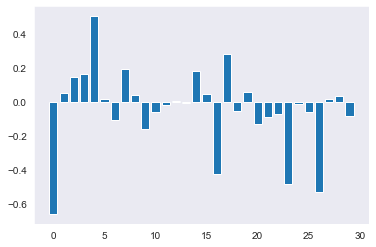

In [96]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=30, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.05401
Feature: 1, Score: 0.00343
Feature: 2, Score: 0.01053
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.17168
Feature: 5, Score: 0.00778
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.03740
Feature: 8, Score: 0.00686
Feature: 9, Score: 0.00801
Feature: 10, Score: 0.01433
Feature: 11, Score: 0.01070
Feature: 12, Score: 0.00480
Feature: 13, Score: 0.00806
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.09086
Feature: 17, Score: 0.01322
Feature: 18, Score: 0.01203
Feature: 19, Score: 0.01393
Feature: 20, Score: 0.01072
Feature: 21, Score: 0.00356
Feature: 22, Score: 0.01264
Feature: 23, Score: 0.36206
Feature: 24, Score: 0.00267
Feature: 25, Score: 0.00877
Feature: 26, Score: 0.12211
Feature: 27, Score: 0.00645
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00339


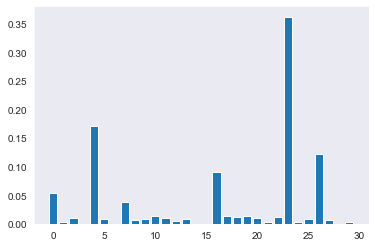

In [97]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=30, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [98]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 1695 to 860
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          4930 non-null   int64  
 1   tenure                                 4930 non-null   int64  
 2   MonthlyCharges                         4930 non-null   float64
 3   TotalCharges                           4930 non-null   float64
 4   gender_Male                            4930 non-null   uint8  
 5   Partner_Yes                            4930 non-null   uint8  
 6   Dependents_Yes                         4930 non-null   uint8  
 7   PhoneService_Yes                       4930 non-null   uint8  
 8   MultipleLines_No phone service         4930 non-null   uint8  
 9   MultipleLines_Yes                      4930 non-null   uint8  
 10  InternetService_Fiber optic            4930 non-null   uint8  
 11  In

In [99]:
# removing unwanted columns

X_1=ch_X.drop(['gender_Male','Dependents_Yes','StreamingTV_Yes','StreamingMovies_No internet service','StreamingTV_No internet service','OnlineSecurity_No internet service','InternetService_Fiber optic','DeviceProtection_No internet service','DeviceProtection_Yes'],axis=1)

In [100]:
X_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Partner_Yes                            7043 non-null   uint8  
 5   PhoneService_Yes                       7043 non-null   uint8  
 6   MultipleLines_No phone service         7043 non-null   uint8  
 7   MultipleLines_Yes                      7043 non-null   uint8  
 8   InternetService_No                     7043 non-null   uint8  
 9   OnlineSecurity_Yes                     7043 non-null   uint8  
 10  OnlineBackup_No internet service       7043 non-null   uint8  
 11  Onli

In [101]:
X_1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_No,OnlineSecurity_Yes,...,OnlineBackup_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [102]:
X_1.shape

(7043, 21)

In [104]:
# FEATURE SCALING
# STANDARDIZATION X-MEAN/SD

from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
scalar.fit(X_1)
scaled_X_1=scalar.transform(X_1)

In [105]:
## train_test_split for model building
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_X_1,ch_Y,test_size=0.3, random_state=42)


In [106]:
type(scaled_X_1)

numpy.ndarray

In [107]:
x_train.shape

(4930, 21)

In [108]:
x_test.shape

(2113, 21)

In [109]:
y_train.shape

(4930,)

In [110]:
y_test.shape

(2113,)

In [111]:
##LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [112]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8135352579271179

In [113]:
lr_model=LogisticRegression(random_state=42)
#fitting the model-
lr_model.fit(x_train,y_train)
lr_model.fit(x_test,y_test)

Train_score=lr_model.score(x_train,y_train)
Test_score=lr_model.score(x_test,y_test)


In [114]:
Train_score

0.8036511156186612

In [115]:
Test_score

0.8092759110269758

In [116]:
score= accuracy_score(y_test,y_pred)
score

0.8135352579271179

In [117]:
#creating the confusion matrix

confusion_matrix(y_test,y_pred)

array([[1388,  151],
       [ 243,  331]], dtype=int64)

In [118]:
#creating the confusion matrix metrices

from sklearn.metrics import accuracy_score ,recall_score,precision_score,f1_score
from sklearn.metrics import classification_report

matrix = classification_report(y_test,y_pred)
print('classification_report : \n',matrix)

classification_report : 
               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1539
           1       0.69      0.58      0.63       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113



In [119]:
## DECISION TREE

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
hm=DecisionTreeClassifier()
hm.fit(x_train,y_train)

DecisionTreeClassifier()

In [122]:
y_pred=hm.predict(x_test)

In [123]:
y_pred

array([1, 1, 0, ..., 0, 0, 1])

In [124]:
accuracy_score(y_test,y_pred)*100

73.82867960246095

In [125]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [126]:
y_pred_gini = clf_gini.predict(x_test)

In [127]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7743


In [128]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [129]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7335541883577852


In [130]:
Train_score

0.8036511156186612

In [131]:
Test_score

0.8092759110269758

In [132]:
score= accuracy_score(y_test,y_pred)
score

0.7335541883577852

In [133]:
#creating the confusion matrix

confusion_matrix(y_test,y_pred)

array([[1265,  274],
       [ 289,  285]], dtype=int64)

In [134]:
#creating the confusion matrix metrices

from sklearn.metrics import accuracy_score ,recall_score,precision_score,f1_score
from sklearn.metrics import classification_report

matrix = classification_report(y_test,y_pred)
print('classification_report : \n',matrix)

classification_report : 
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1539
           1       0.51      0.50      0.50       574

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113



In [135]:
#Random Forest Classifier model with parameter n_estimators=100 
from sklearn.ensemble import RandomForestClassifier

In [136]:
# creating a RF classifier
rf = RandomForestClassifier(n_estimators = 100, random_state=0) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rf.fit(x_train, y_train)
 
# performing predictions on the test dataset
y_pred = rf.predict(x_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.791292001893043


In [137]:
Train_score

0.8036511156186612

In [138]:
Test_score

0.8092759110269758

In [139]:
score= accuracy_score(y_test,y_pred)
score

0.791292001893043

In [140]:
#creating the confusion matrix

confusion_matrix(y_test,y_pred)

array([[1399,  140],
       [ 301,  273]], dtype=int64)

In [141]:
#creating the confusion matrix metrices

from sklearn.metrics import accuracy_score ,recall_score,precision_score,f1_score
from sklearn.metrics import classification_report

matrix = classification_report(y_test,y_pred)
print('classification_report : \n',matrix)

classification_report : 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.66      0.48      0.55       574

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [142]:
#Random Forest Classifier model with default parameters 

In [143]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rf = RandomForestClassifier(random_state=0)



# fit the model

rf.fit(x_train, y_train)
# Predict the Test set results

y_pred = rf.predict(x_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7913


In [144]:
Train_score

0.8036511156186612

In [145]:
Test_score

0.8092759110269758

In [146]:
score= accuracy_score(y_test,y_pred)
score

0.791292001893043

In [147]:
#creating the confusion matrix

confusion_matrix(y_test,y_pred)

array([[1399,  140],
       [ 301,  273]], dtype=int64)

In [148]:
#creating the confusion matrix metrices

from sklearn.metrics import accuracy_score ,recall_score,precision_score,f1_score
from sklearn.metrics import classification_report

matrix = classification_report(y_test,y_pred)
print('classification_report : \n',matrix)

classification_report : 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.66      0.48      0.55       574

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [149]:
#pca 

In [150]:
#view_models_eval()

In [151]:
#Scaling the independent features before applying PCA

from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
scalar.fit(ch_X)
scaled_df=scalar.transform(ch_X)

In [152]:
#Fitting the scaled data in PCA

from sklearn.decomposition import PCA
pca=PCA()
PCA_result=pca.fit(scaled_df)
exp_var_pca = pca.explained_variance_ratio_
exp_var_pca


array([3.31797827e-01, 1.19839908e-01, 9.02183870e-02, 4.75179309e-02,
       4.14618471e-02, 4.11970364e-02, 3.81197227e-02, 3.33670987e-02,
       3.12048274e-02, 2.95264421e-02, 2.66012191e-02, 2.37813626e-02,
       2.24863549e-02, 2.05587558e-02, 2.02246981e-02, 1.75323017e-02,
       1.55542237e-02, 1.52435206e-02, 1.46640388e-02, 9.22973847e-03,
       7.91996380e-03, 1.92286066e-03, 2.99335718e-05, 2.56758966e-32,
       2.47181445e-33, 2.47181445e-33, 2.47181445e-33, 2.47181445e-33,
       2.47181445e-33, 2.47181445e-33])

In [153]:
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
cum_sum_eigenvalues

array([0.33179783, 0.45163774, 0.54185612, 0.58937405, 0.6308359 ,
       0.67203294, 0.71015266, 0.74351976, 0.77472459, 0.80425103,
       0.83085225, 0.85463361, 0.87711996, 0.89767872, 0.91790342,
       0.93543572, 0.95098994, 0.96623346, 0.9808975 , 0.99012724,
       0.99804721, 0.99997007, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

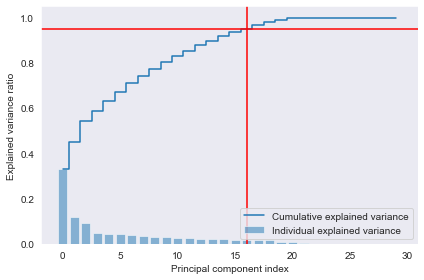

In [154]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.axhline(y=.95,color='r')
plt.axvline(x=16,color='r')
plt.tight_layout()
plt.show()

In [155]:
pca=PCA(n_components=16)
# finding the PCA
PCA_result=pca.fit(scaled_df)
x_pca=pca.fit_transform(scaled_df)
X_train=pd.DataFrame(x_pca) 


In [156]:
from sklearn.model_selection import train_test_split

x_train_pca,x_test_pca,y_train_pca,y_test_pca=train_test_split(X_train,ch_Y,test_size=0.3, random_state=42)

In [157]:
#PCA IN LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train_pca,y_train_pca)

model.score(x_test_pca,y_test_pca)

0.8054898248935163

In [158]:
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score

from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc

In [159]:
lr_model=LogisticRegression(random_state=42)
#fitting the model-
lr_model.fit(x_train,y_train)
lr_model.fit(x_test,y_test)

Train_score=lr_model.score(x_train,y_train)
Test_score=lr_model.score(x_test,y_test)

#Cross validation prediction of lr_model-
cv_predict=cross_val_predict(lr_model,x_test,y_test,cv=5)
#Cross validation score-
cv_score=cross_val_score(lr_model,x_test,y_test,cv=5)

#ROC_AUC SCORE:-
roc_score=roc_auc_score(y_test,cv_predict)

score=[]
score.append({'Train_accuracy':Train_score,'Test_accuracy':Test_score,'cross val score':np.average(cv_score),'ROC Score':roc_score})

scr=pd.DataFrame(score)
scr

,Train_accuracy,Test_accuracy,cross val score,ROC Score
0,0.803651,0.809276,0.806424,0.732758


In [160]:
#Confusion matrix:-
cm=confusion_matrix(y_test,cv_predict)
cm=pd.crosstab(y_test,cv_predict)
cm

col_0,0,1
target,,
0,1376,163
1,246,328


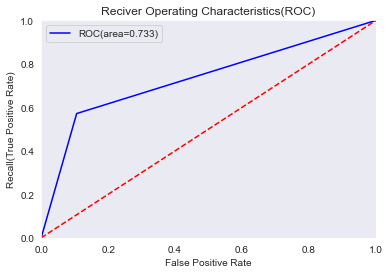

AUC: 0.7327578204771187


In [161]:
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_test,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [162]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, cv_predict)


print(auc_score1)

0.7327578204771187


In [163]:
#PCA IN DECISION TREE

In [164]:
lr_model=DecisionTreeClassifier(random_state=42)
#fitting the model-
lr_model.fit(x_train,y_train)
lr_model.fit(x_test,y_test)

Train_score=lr_model.score(x_train,y_train)
Test_score=lr_model.score(x_test,y_test)

#Cross validation prediction of lr_model-
cv_predict=cross_val_predict(lr_model,x_test,y_test,cv=5)
#Cross validation score-
cv_score=cross_val_score(lr_model,x_test,y_test,cv=5)

#ROC_AUC SCORE:-
roc_score=roc_auc_score(y_test,cv_predict)

score=[]
score.append({'Train_accuracy':Train_score,'Test_accuracy':Test_score,'cross val score':np.average(cv_score),'ROC Score':roc_score})

scr=pd.DataFrame(score)
scr

,Train_accuracy,Test_accuracy,cross val score,ROC Score
0,0.717647,0.999053,0.720304,0.650142


In [165]:
#Confusion matrix:-
cm=confusion_matrix(y_test,cv_predict)
cm=pd.crosstab(y_test,cv_predict)
cm

col_0,0,1
target,,
0,1237,302
1,289,285


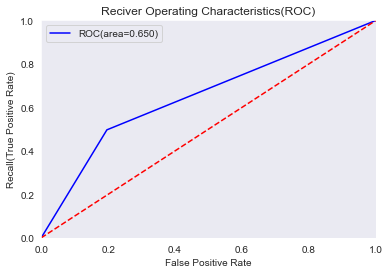

AUC: 0.650142180202086


In [166]:
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_test,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [167]:
## PCA IN RANDOM FOREST

In [168]:
lr_model=RandomForestClassifier(random_state=42)
#fitting the model-
lr_model.fit(x_train,y_train)
lr_model.fit(x_test,y_test)

Train_score=lr_model.score(x_train,y_train)
Test_score=lr_model.score(x_test,y_test)

#Cross validation prediction of lr_model-
cv_predict=cross_val_predict(lr_model,x_test,y_test,cv=5)
#Cross validation score-
cv_score=cross_val_score(lr_model,x_test,y_test,cv=5)

#ROC_AUC SCORE:-
roc_score=roc_auc_score(y_test,cv_predict)

score=[]
score.append({'Train_accuracy':Train_score,'Test_accuracy':Test_score,'cross val score':np.average(cv_score),'ROC Score':roc_score})

scr=pd.DataFrame(score)
scr

,Train_accuracy,Test_accuracy,cross val score,ROC Score
0,0.789858,0.999053,0.777092,0.689675


In [169]:
#Confusion matrix:-
cm=confusion_matrix(y_test,cv_predict)
cm=pd.crosstab(y_test,cv_predict)
cm

col_0,0,1
target,,
0,1356,183
1,288,286


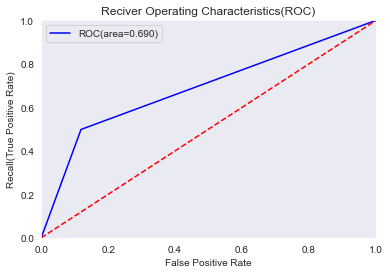

AUC: 0.6896747288274888


In [170]:
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_test,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [171]:
#our model's accuracy is not so good, because of our imbalanced dataset

In [172]:
# will treat imbalanced dataset by using SMOTE

In [173]:
import imblearn
from imblearn.over_sampling import SMOTE
#SMOTE:-
sm = SMOTE(random_state=42)
#Generating synthetic data points
x_smote_Train,y_smote_Train=sm.fit_resample(x_train,y_train)
x_smote_Test,y_smote_Test=sm.fit_resample(x_test,y_test)

In [174]:
lr_model=LogisticRegression(random_state=42)
#fitting the model-
lr_model.fit(x_smote_Train,y_smote_Train)
lr_model.fit(x_smote_Test,y_smote_Test)

LogisticRegression(random_state=42)

In [175]:
x_smote_Train.shape,y_smote_Train,x_smote_Test,y_smote_Test

((7270, 21),
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 7265    1
 7266    1
 7267    1
 7268    1
 7269    1
 Name: target, Length: 7270, dtype: int32,
 array([[-0.43991649, -1.27744458, -1.32816441, ..., -0.52504733,
          1.40641839, -0.54480692],
        [-0.43991649,  0.35136997, -1.31320824, ..., -0.52504733,
         -0.71102597, -0.54480692],
        [-0.43991649,  0.79929397, -1.50930029, ..., -0.52504733,
         -0.71102597,  1.83551265],
        ...,
        [-0.43991649, -1.27744458,  0.32366181, ..., -0.52504733,
          1.40641839, -0.54480692],
        [-0.43991649, -1.26500352,  0.33787795, ..., -0.52504733,
          1.40641839, -0.54480692],
        [-0.43991649, -1.25288945, -0.32371507, ..., -0.52504733,
          0.1295603 , -0.54480692]]),
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 3073    1
 3074    1
 3075    1
 3076    1
 3077    1
 Name: target, Length: 3078, dtype: int32)

In [176]:
#Accuracy of model-
Train_score=lr_model.score(x_smote_Train,y_smote_Train)
Test_score=lr_model.score(x_smote_Test,y_smote_Test)

#Cross validation prediction of lr_model-
cv_predict=cross_val_predict(lr_model,x_smote_Test,y_smote_Test,cv=5)
#Cross validation score-
cv_score=cross_val_score(lr_model,x_smote_Test,y_smote_Test,cv=5)

#ROC_AUC SCORE:-
roc_score=roc_auc_score(y_smote_Test,cv_predict)

score=[]
score.append({'Train_accuracy':Train_score,'Test_accuracy':Test_score,'cross val score':np.average(cv_score),'ROC Score':roc_score})

scr=pd.DataFrame(score)
scr

,Train_accuracy,Test_accuracy,cross val score,ROC Score
0,0.765887,0.794022,0.78688,0.786875


In [177]:
#Confusion matrix:-
cm=confusion_matrix(y_smote_Test,cv_predict)
cm=pd.crosstab(y_smote_Test,cv_predict)
cm

col_0,0,1
target,,
0,1159,380
1,276,1263


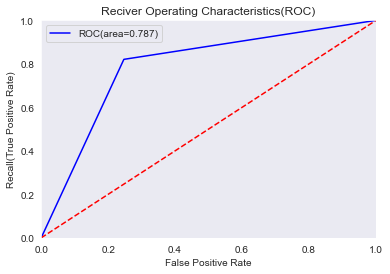

AUC: 0.7868745938921378


In [178]:
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_smote_Test,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [179]:
#Classification report:-
classification_scores=classification_report(y_smote_Test,cv_predict)
print(classification_scores)

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1539
           1       0.77      0.82      0.79      1539

    accuracy                           0.79      3078
   macro avg       0.79      0.79      0.79      3078
weighted avg       0.79      0.79      0.79      3078



In [180]:
dt_model=DecisionTreeClassifier(random_state=42)
#fitting the model-
dt_model.fit(x_smote_Train,y_smote_Train)
dt_model.fit(x_smote_Test,y_smote_Test)

DecisionTreeClassifier(random_state=42)

In [181]:
x_smote_Train.shape,y_smote_Train,x_smote_Test,y_smote_Test

((7270, 21),
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 7265    1
 7266    1
 7267    1
 7268    1
 7269    1
 Name: target, Length: 7270, dtype: int32,
 array([[-0.43991649, -1.27744458, -1.32816441, ..., -0.52504733,
          1.40641839, -0.54480692],
        [-0.43991649,  0.35136997, -1.31320824, ..., -0.52504733,
         -0.71102597, -0.54480692],
        [-0.43991649,  0.79929397, -1.50930029, ..., -0.52504733,
         -0.71102597,  1.83551265],
        ...,
        [-0.43991649, -1.27744458,  0.32366181, ..., -0.52504733,
          1.40641839, -0.54480692],
        [-0.43991649, -1.26500352,  0.33787795, ..., -0.52504733,
          1.40641839, -0.54480692],
        [-0.43991649, -1.25288945, -0.32371507, ..., -0.52504733,
          0.1295603 , -0.54480692]]),
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 3073    1
 3074    1
 3075    1
 3076    1
 3077    1
 Name: target, Length: 3078, dtype: int32)

In [182]:
#Accuracy of model-
Train_score=dt_model.score(x_smote_Train,y_smote_Train)
Test_score=dt_model.score(x_smote_Test,y_smote_Test)

#Cross validation prediction of lr_model-
cv_predict=cross_val_predict(dt_model,x_smote_Test,y_smote_Test,cv=5)
#Cross validation score-
cv_score=cross_val_score(dt_model,x_smote_Test,y_smote_Test,cv=5)

#ROC_AUC SCORE:-
roc_score=roc_auc_score(y_smote_Test,cv_predict)

score=[]
score.append({'Train_accuracy':Train_score,'Test_accuracy':Test_score,'cross val score':np.average(cv_score),'ROC Score':roc_score})

scr=pd.DataFrame(score)
scr

,Train_accuracy,Test_accuracy,cross val score,ROC Score
0,0.695598,0.99935,0.768707,0.768681


In [183]:
#Confusion matrix:-
cm=confusion_matrix(y_smote_Test,cv_predict)
cm=pd.crosstab(y_smote_Test,cv_predict)
cm

col_0,0,1
target,,
0,1160,379
1,333,1206


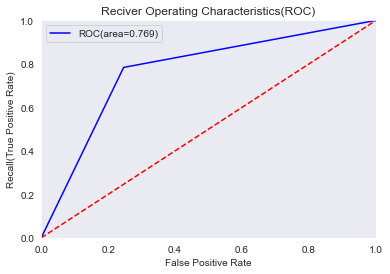

AUC: 0.7686809616634178


In [184]:
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_smote_Test,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [185]:
#Classification report:-
classification_scores=classification_report(y_smote_Test,cv_predict)
print(classification_scores)

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1539
           1       0.76      0.78      0.77      1539

    accuracy                           0.77      3078
   macro avg       0.77      0.77      0.77      3078
weighted avg       0.77      0.77      0.77      3078



In [186]:
RandomForestClassifier

sklearn.ensemble._forest.RandomForestClassifier

In [187]:
rf_model=RandomForestClassifier(random_state=42)
#fitting the model-
rf_model.fit(x_smote_Train,y_smote_Train)
rf_model.fit(x_smote_Test,y_smote_Test)

RandomForestClassifier(random_state=42)

In [188]:
x_smote_Train.shape,y_smote_Train,x_smote_Test,y_smote_Test

((7270, 21),
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 7265    1
 7266    1
 7267    1
 7268    1
 7269    1
 Name: target, Length: 7270, dtype: int32,
 array([[-0.43991649, -1.27744458, -1.32816441, ..., -0.52504733,
          1.40641839, -0.54480692],
        [-0.43991649,  0.35136997, -1.31320824, ..., -0.52504733,
         -0.71102597, -0.54480692],
        [-0.43991649,  0.79929397, -1.50930029, ..., -0.52504733,
         -0.71102597,  1.83551265],
        ...,
        [-0.43991649, -1.27744458,  0.32366181, ..., -0.52504733,
          1.40641839, -0.54480692],
        [-0.43991649, -1.26500352,  0.33787795, ..., -0.52504733,
          1.40641839, -0.54480692],
        [-0.43991649, -1.25288945, -0.32371507, ..., -0.52504733,
          0.1295603 , -0.54480692]]),
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 3073    1
 3074    1
 3075    1
 3076    1
 3077    1
 Name: target, Length: 3078, dtype: int32)

In [189]:
#Accuracy of model-
Train_score=dt_model.score(x_smote_Train,y_smote_Train)
Test_score=dt_model.score(x_smote_Test,y_smote_Test)

#Cross validation prediction of lr_model-
cv_predict=cross_val_predict(rf_model,x_smote_Test,y_smote_Test,cv=5)
#Cross validation score-
cv_score=cross_val_score(rf_model,x_smote_Test,y_smote_Test,cv=5)

#ROC_AUC SCORE:-
roc_score=roc_auc_score(y_smote_Test,cv_predict)

score=[]
score.append({'Train_accuracy':Train_score,'Test_accuracy':Test_score,'cross val score':np.average(cv_score),'ROC Score':roc_score})

scr=pd.DataFrame(score)
scr

,Train_accuracy,Test_accuracy,cross val score,ROC Score
0,0.695598,0.99935,0.844404,0.844379


In [190]:
#Confusion matrix:-
cm=confusion_matrix(y_smote_Test,cv_predict)
cm=pd.crosstab(y_smote_Test,cv_predict)
cm

col_0,0,1
target,,
0,1271,268
1,211,1328


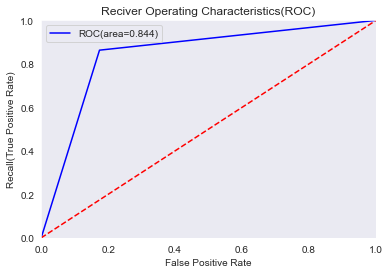

AUC: 0.8443794671864847


In [191]:
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_smote_Test,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [192]:
#Classification report:-
classification_scores=classification_report(y_smote_Test,cv_predict)
print(classification_scores)

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1539
           1       0.83      0.86      0.85      1539

    accuracy                           0.84      3078
   macro avg       0.84      0.84      0.84      3078
weighted avg       0.84      0.84      0.84      3078

